# Downloading and Prepping Data <a id="2"></a>

Import primary modules.

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib as mpl
import matplotlib.pyplot as plt

Download the dataset and read it into a *pandas* dataframe.

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [4]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

In [11]:
### type your answer here
# gunakan fungsi pandas group by continent (untuk memisahkan data) 
df_continents = df_can.groupby('Continent', axis=0).sum()
df_continents.head()
print(type(df_can.groupby('Continent', axis=0)))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


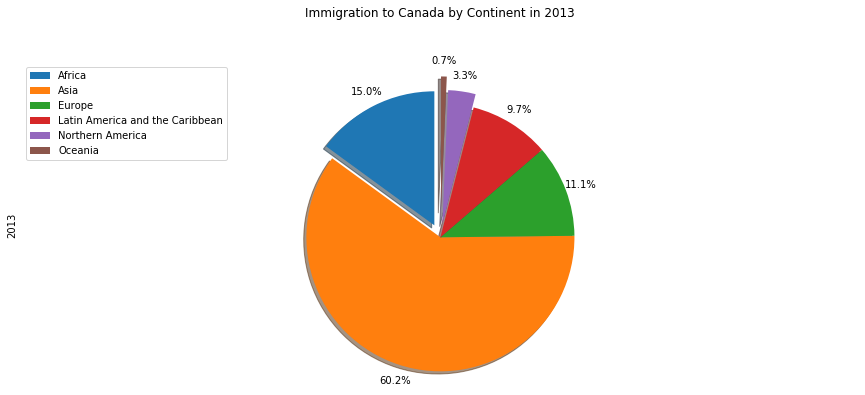

In [13]:
#plot data
explode_list = [0.1, 0, 0, 0, 0.1, 0.2] 
df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                
                            pctdistance=1.12,           
                            explode=explode_list        
                            )
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='upper left') 
plt.show()


**Question 2:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

Step 1: Get the dataset for China and India and call the dataframe **df_CI**.

In [18]:
### type your answer here
data = df_can.loc[['China','India'], years].transpose()
data

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


Step 2: Plot data.

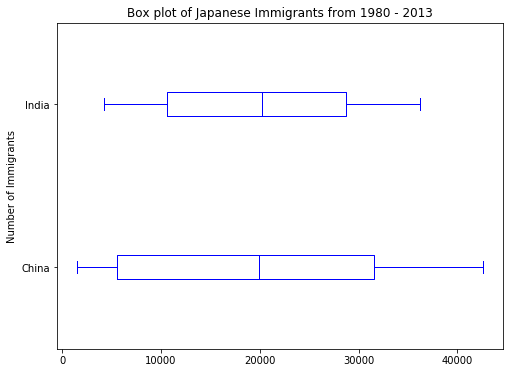

In [19]:
### type your answer here
data.plot(kind='box',color='blue', vert=False, figsize=(8, 6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

**Question 3:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.

Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe **df_top15**.

In [20]:
### type your answer here
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top15 = df_can.head(15)

df_top15.set_index('Continent',inplace=True)
df_top15.columns = list(map(str, df_top15.columns))
# transpose dataframe
df_top15.head(15)

,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:
   1. Create a list of all years in decades 80's, 90's, and 00's.
   2. Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
   3. Merge the three series into a new data frame. Call your dataframe **new_df**.

In [22]:
### type your answer here
years80 = list(map(str, range(1980, 1989))) 
years90 = list(map(str, range(1990, 1999))) 
years00 = list(map(str, range(2000, 2009))) 

#df_top15
df_80 = df_top15.loc[:,years80].sum(axis=1)
df_90 = df_top15.loc[:,years90].sum(axis=1)
df_00 = df_top15.loc[:,years00].sum(axis=1)

new_df = pd.DataFrame({'1980':df_80,'1990':df_90,'2000':df_00})
new_df.head()

,1980,1990,2000
Continent,,,
Asia,71811,161421,274135
Asia,27680,131459,310763
Europe,155376,254921,74537
Asia,48899,128748,144331
Asia,8330,55323,120381


Step 3: Plot the box plots.

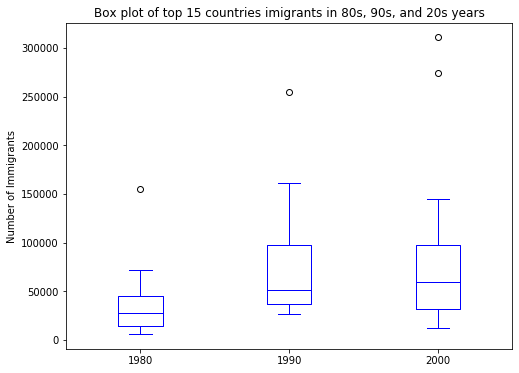

In [23]:
### type your answer here
new_df.plot(kind='box',color='blue', figsize=(8, 6))

plt.title('Box plot of top 15 countries imigrants in 80s, 90s, and 20s years')
plt.ylabel('Number of Immigrants')
plt.show()

**Question 4**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [24]:
### type your answer here
df_countries = df_can.loc[['Denmark', 'Norway','Sweden'], years].transpose()
df_countries['Total'] = df_countries.sum(axis=1)
df_countries.drop(['Denmark', 'Norway', 'Sweden'], axis=1, inplace=True)
df_countries.index = map(int, df_countries.index)
df_countries.reset_index(inplace = True)
df_countries.rename(columns={'index':'year'}, inplace=True)
df_countries.head()

Country,year,Total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [26]:
#hitung total populasi pertahun
df_total = pd.DataFrame(df_can[years].sum(axis=0))

#rubah tipe data year menjadi integer
df_total.index = map(int, df_total.index)

#reset index untuk memasukkan kembali kolom sebagai kolom di dataframe df_total
df_total.reset_index(inplace = True)

#ubah nama kolom
df_total.columns = ['year', 'total']

#show datafraem
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

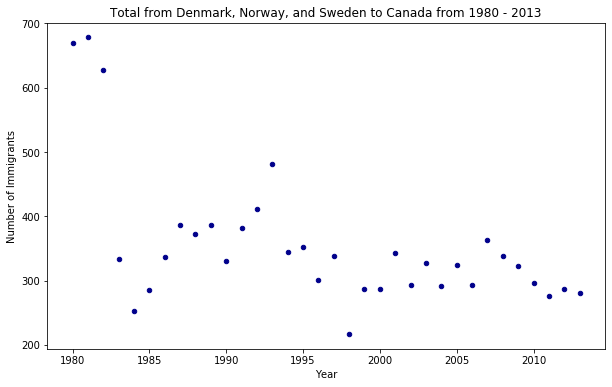

In [27]:
### type your answer here
df_countries.plot(kind='scatter', x='year', y='Total', figsize=(10, 6), color='darkblue')

plt.title('Total from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

**Question 5**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [28]:
### type your answer here
#transpose dataframe
df_can_t = df_can[years].transpose() 

#memudahkan untuk memasukkan tipe data integer dalam year
df_can_t.index = map(int, df_can_t.index)

#namain label index
df_can_t.index.name = 'Year'

#setel ulang index untuk memasukkan tahun sebagai kolom
df_can_t.reset_index(inplace=True)

#show data
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


Step 2: Generate the bubble plots.

In [29]:
### type your answer here
# normalisasi data china
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalisasi data india
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

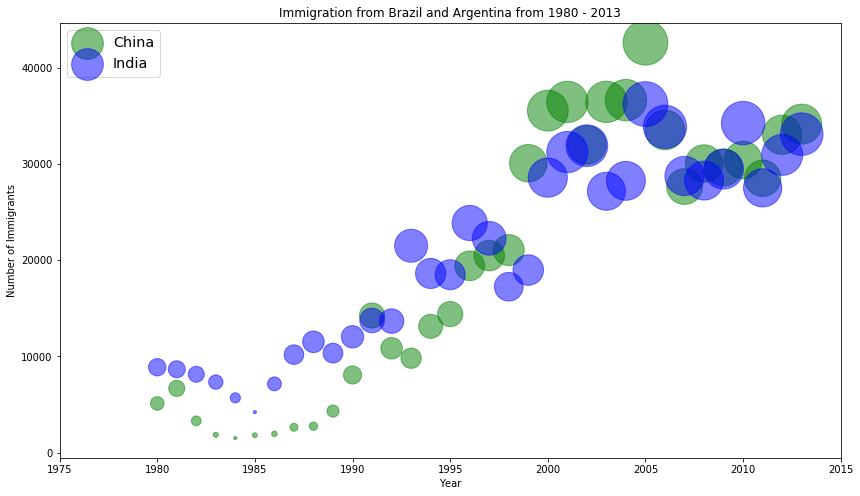

In [31]:
#plot data
#China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  
                    color='green',
                    s=norm_china * 2000 + 10,   
                    xlim=(1975, 2015)
                   )

#India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).